In [54]:
import numpy as np
import pandas as pd
import umap
import umap.plot

if __name__ == "__main__":
    print("Loading Rule Data...")
    data = np.load('goldilocks_data.npz')
    diffs = np.load('goldilocks_diffs.npz')
    target = np.load('goldilocks_target.npz')
    print("Rule data loaded with shape {}".format(data.shape))

    print("Embedding into two dimensions using umap...")
    embedding = umap.UMAP().fit(data)
    print("Embedding complete.")

    average_diffs = diffs.mean(axis=1)
    hover_data = pd.DataFrame({
        'index': np.arange(data.shape[0]),
        'number': target,
        'average_diff': average_diffs,
    })

Loading Rule Data...
Rule data loaded with shape (10291, 256)
Embedding into two dimensions using umap...
Embedding complete.


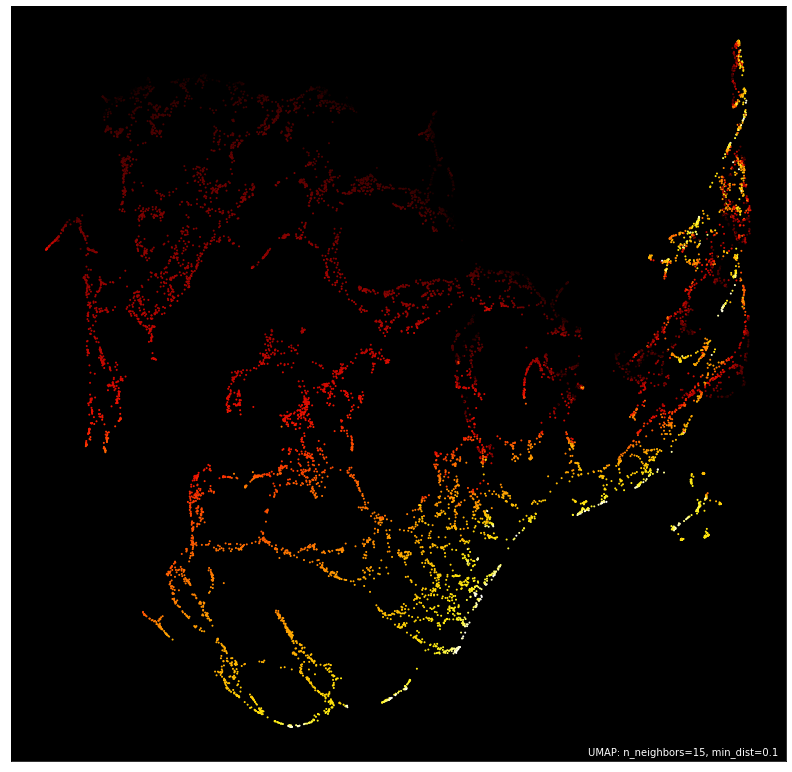

In [55]:
umap.plot.points(
     embedding,
     values=average_diffs,
     theme='fire',
     width=1000,
     height=1000,
)

In [61]:
def mapper(t):
    if t == 6152:
        return 100
    else:
        return 1

values = np.array([mapper(t) for t in target])
plot = umap.plot.interactive(
    embedding,
    values=values,
    hover_data=hover_data,
    theme='fire',
    point_size=1,
)

umap.plot.show(plot)